In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sm
from scipy import stats

import statsmodels as sm
from statsmodels.stats.weightstats import ttest_ind

from sklearn.model_selection import train_test_split,KFold,cross_validate
from sklearn.linear_model import LinearRegression


# Data Cleaning

In [158]:
# importing the csv dataset and printing out the first ten rows 
df = pd.read_csv('kc_house_data.csv')
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [159]:
# printing out all information for the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [160]:
# data over 1 year
df['date']= pd.to_datetime(df['date']) 
print(df['date'].min())
print(df['date'].max())

2014-05-02 00:00:00
2015-05-27 00:00:00


In [161]:
# checking for missing values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [162]:
# there are some missing values for waterfront
df['waterfront'].unique()
# filling missing values with 0
df['waterfront'] = df['waterfront'].fillna(0)
df['waterfront'].unique()


array([0., 1.])

In [163]:
# filling missing values with 0
df['view'].unique()
df['view'] = df['view'].fillna(0)

In [164]:
# filling missing values for renovated houses and putting them as 0 too
df['yr_renovated'] = df['yr_renovated'].fillna(0)
df['yr_renovated'] .unique()


array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [165]:
# also the square_basement feature seems to be an object
#  and there are some question marks. Assuming those means unknown we are setting them to 0

df['sqft_basement'].value_counts()
df['sqft_basement'] = df['sqft_basement'].fillna(0)

# changed the type from object to float
df['sqft_basement'] = df['sqft_basement'].replace({'?': 0})
df['sqft_basement'].astype(float)
df['fl_sqft_basement'] = df['sqft_basement'].astype(float)
df.drop('sqft_basement', axis = 1, inplace = True)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id                  21597 non-null int64
date                21597 non-null datetime64[ns]
price               21597 non-null float64
bedrooms            21597 non-null int64
bathrooms           21597 non-null float64
sqft_living         21597 non-null int64
sqft_lot            21597 non-null int64
floors              21597 non-null float64
waterfront          21597 non-null float64
view                21597 non-null float64
condition           21597 non-null int64
grade               21597 non-null int64
sqft_above          21597 non-null int64
yr_built            21597 non-null int64
yr_renovated        21597 non-null float64
zipcode             21597 non-null int64
lat                 21597 non-null float64
long                21597 non-null float64
sqft_living15       21597 non-null int64
sqft_lot15          21597 non-null int64
fl_sqft_basement    21597 non-null float64
dty

In [167]:
#There are 177 house that have been sold twice (or more)
id_len = len(df['id'].unique())
x = len(df) - id_len
x

177

In [168]:
# one of them has been sold  three times
df['id'].value_counts()

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

In [169]:
# showcasing the house sold three times
unique_3_initial = df.loc[df['id'] == 795000620]
unique_3_initial

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,fl_sqft_basement
17588,795000620,2014-09-24,115000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,5,1080,1950,0.0,98168,47.5045,-122.33,1070,6250,0.0
17589,795000620,2014-12-15,124000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,5,1080,1950,0.0,98168,47.5045,-122.33,1070,6250,0.0
17590,795000620,2015-03-11,157000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,5,1080,1950,0.0,98168,47.5045,-122.33,1070,6250,0.0


In [170]:
# created a new Dataframe with unique values and last price for the double houses.
df_unique = df.drop_duplicates(subset = 'id', keep = 'last')

# Showcasing the in the unique dataset and the only house sold three times, the last price has been left
unique_3 = df_unique.loc[df_unique['id'] == 795000620]
unique_3

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,fl_sqft_basement
17590,795000620,2015-03-11,157000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,5,1080,1950,0.0,98168,47.5045,-122.33,1070,6250,0.0


In [171]:
# Created a new DataFrame for houses sold twice. One of them (795000620) three times
houses_sold_twice = df[df.duplicated(['id'], keep= 'first')]
len(houses_sold_twice)


177

In [172]:
# double checking how many houses sold twice are present in the initial dataframe
# number is 353 because all IDs are repeated twice with the exception of the house sold 3 times
x = df['id'].isin(houses_sold_twice['id']) == 1
x.value_counts()
len(x)

21597

In [173]:
# updated initial df with a new columns indicating whether the house has been sold more than once

df['sold_twice'] = df['id'].isin(houses_sold_twice['id']) == 1
df.loc[(df['sold_twice']== True),'sold_twice_y'] = 1
df.drop('sold_twice', axis = 1 , inplace = True)
df['sold_twice_y'] = df['sold_twice_y'].fillna(0).astype(int)


In [174]:
# how many zipcodes are there
len(df['zipcode'].unique())

70

In [175]:
# importing cities to replace zipcodes

data_zip = pd.read_html ('http://www.ciclt.net/sn/clt/capitolimpact/gw_ziplist.aspx?FIPS=53033')
final_zip = pd.concat([data_zip[2],data_zip[3],data_zip[4]])

final_zip.drop('County',axis = 1, inplace = True)
final_zip.rename(columns={'Zip Code':'zipcode'}, inplace=True)
# found duplicates in zipcodes
final_zip['zipcode'].value_counts()



98004    5
98148    5
98155    5
98198    4
98168    4
        ..
98224    1
98002    1
98005    1
98006    1
98050    1
Name: zipcode, Length: 108, dtype: int64

In [176]:
# dropping the duplicates of zipcodes as mostly are from Seattle -- 54
final_zip = final_zip.drop_duplicates(subset = 'zipcode', keep = 'last')
len(final_zip)

# merging the unique values of zipcodes with our dataframe
merged = pd.merge(df,final_zip,on='zipcode',how='left')
len(merged)
merged.isna().sum()

id                    0
date                  0
price                 0
bedrooms              0
bathrooms             0
sqft_living           0
sqft_lot              0
floors                0
waterfront            0
view                  0
condition             0
grade                 0
sqft_above            0
yr_built              0
yr_renovated          0
zipcode               0
lat                   0
long                  0
sqft_living15         0
sqft_lot15            0
fl_sqft_basement      0
sold_twice_y          0
City                198
dtype: int64

In [177]:
# singling out the cities left with no City associated and luckily it's only 98077
# 
missing_zip = merged.loc[(merged['City'].isnull())]
missing_zip['zipcode'].value_counts()

98077    198
Name: zipcode, dtype: int64

In [178]:
# Googled zipcode associated with Woodinville and replaced it where missing
missing_zip.loc[missing_zip['City'].isnull(), 'City'] = 'Woodinville'
# doing the same directly on merged
merged.loc[merged['City'].isnull(), 'City'] = 'Woodinville'

In [179]:
# checking we have no missing values for cities
merged.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
fl_sqft_basement    0
sold_twice_y        0
City                0
dtype: int64

In [180]:
# DATA FRAME WITH SOME INITIAL DATA CLEANING PLUS CITIES
merged


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,fl_sqft_basement,sold_twice_y,City
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0,0,Tukwila
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,400.0,0,Seattle
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933,0.0,98028,47.7379,-122.233,2720,8062,0.0,0,Bothell
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,910.0,0,Seattle
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0,0,Redmond
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,2009,0.0,98103,47.6993,-122.346,1530,1509,0.0,0,Seattle
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,2014,0.0,98146,47.5107,-122.362,1830,7200,0.0,0,Seattle
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,2009,0.0,98144,47.5944,-122.299,1020,2007,0.0,0,Seattle
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,2004,0.0,98027,47.5345,-122.069,1410,1287,0.0,0,Issaquah


# Business Questions

## 1. What cities are there the most expensive houses in the State of Washington?

In [181]:
# refining the names 
merged['City'].unique()

array(['Tukwila', 'Seattle', 'Bothell', 'Redmond', 'Federal Way',
       'Maple Valley', 'Bellevue', 'Duvall', 'Auburn', 'Shoreline',
       'Mercer Island', 'Kent', 'Issaquah', 'Renton', 'Vashon',
       'Yarrow Point', 'Kirkland', 'Black Diamond', 'North Bend',
       'Woodinville', 'Snoqualmie', 'Enumclaw', 'Fall City', 'Carnation',
       'Medina'], dtype=object)

In [182]:
# changing some names
merged.loc[((merged['City']=='Lk Forest Park') | (merged['City']== 'Lk Forest Pk')), 'City']='Lake Forest Park'

In [183]:
merged['City'].unique()
# grouping by cities by their average
city_plotting = merged.groupby('City').agg(Av_price=('price','mean'))
city_plotting.reset_index(inplace=True)
city_plotting.sort_values(by='Av_price',ascending= True ,inplace=True)

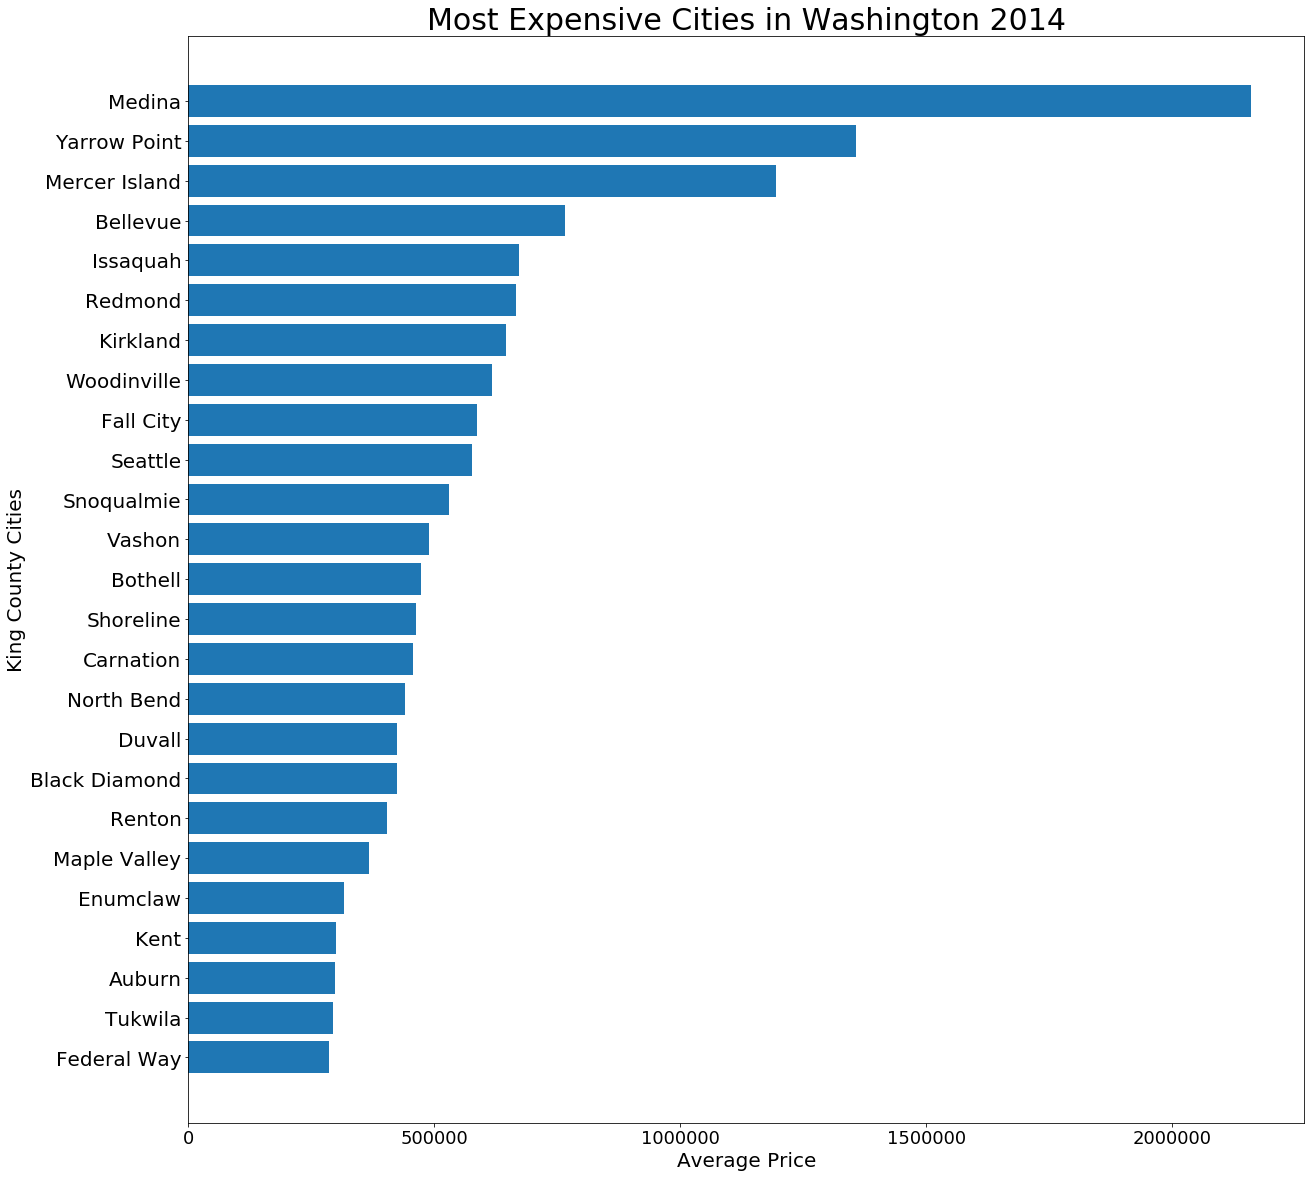

In [184]:

plt.figure(figsize=(20,20))
plt.barh(city_plotting['City'],city_plotting['Av_price'])
plt.title('Most Expensive Cities in Washington 2014', fontsize = 30)
plt.xticks(fontsize=18)
plt.yticks(fontsize = 20)
plt.xlabel('Average Price', fontsize = 20)
plt.ylabel ('King County Cities', fontsize = 20)

plt.show()

##  2. Is there significant evidence that renovating the house increases the price?

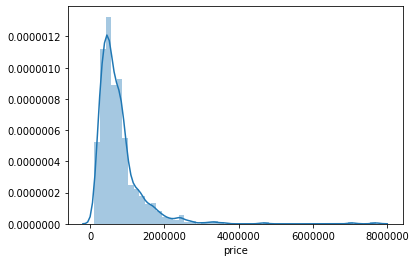

In [185]:
# finding out how many houses were renovated 
df_renovated = df_unique.loc[df['yr_renovated'] > 0]
mean_ren = df_renovated['price'].mean()
std_ren = df_renovated['price'].std()
len(df_renovated)
graph_renovated = sns.distplot(df_renovated['price'])

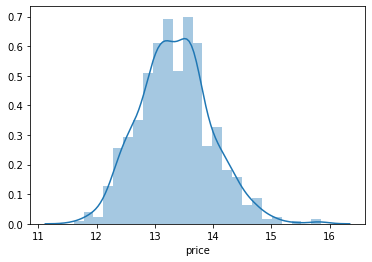

In [186]:
# tranforming renovated house into log
helpful_log_renovated = np.log(df_renovated['price'])
sns.distplot(helpful_log_renovated)
plt.show()

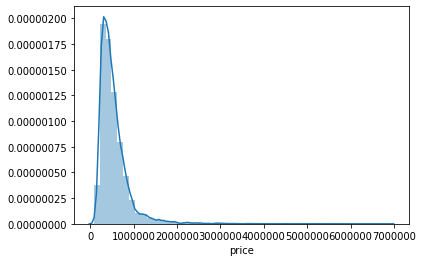

In [187]:
# creating DataFrame for houses that didn't go through renovation
df_non_renovated = df_unique.loc[(df['yr_renovated'] == 0)| (df['yr_renovated'].isnull())]
mean_non_renovated = df_non_renovated['price'].mean()
std_non_renovated = df_non_renovated['price'].std()
len(df_non_renovated)
graph_non_renovated = sns.distplot(df_non_renovated['price'])

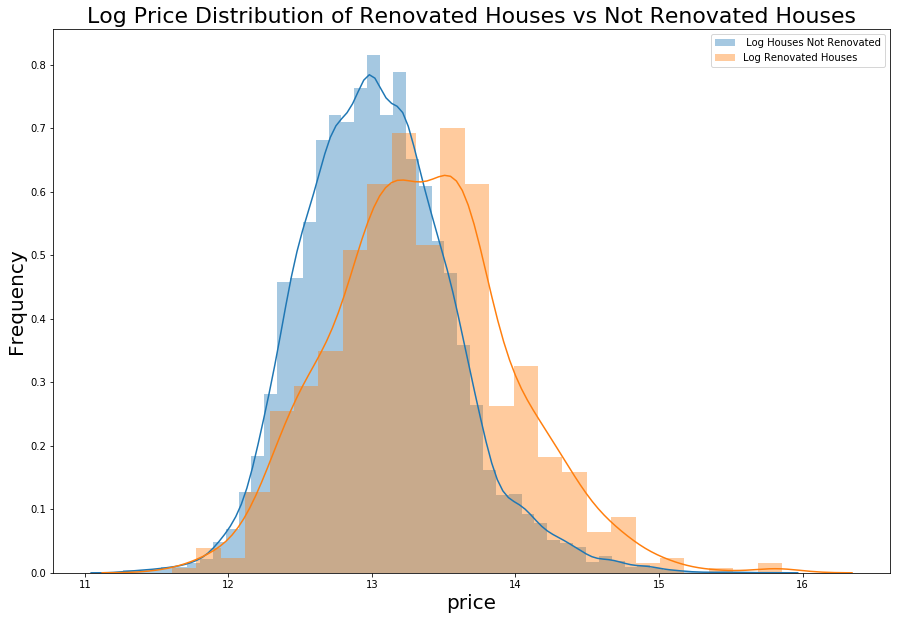

In [188]:
# transforming price into log for not renovated houses
helpful_log_non = np.log(df_non_renovated['price'])


fig,ax = plt.subplots(figsize = (15,10))
plt.title('Log Price Distribution of Renovated Houses vs Not Renovated Houses', fontsize = 22)
ax.set_xlabel('price', fontsize= 20)
ax.set_ylabel('Frequency', fontsize= 20) 

sns.distplot(helpful_log_non, ax=ax, label = ' Log Houses Not Renovated')
sns.distplot(helpful_log_renovated, ax=ax, label = 'Log Renovated Houses')
plt.legend()
plt.show()

In [189]:
# H0 renovation has no effect whatsoever on final price
mu = np.log(df_unique['price']).mean()

one_sample = stats.ttest_1samp(helpful_log_renovated, mu)

print ("The t-statistic is %.3f and the p-value is %.3f." % one_sample)

The t-statistic is 12.998 and the p-value is 0.000.


**There seems to be a significant difference between price of renovated houses and not-renovated houses**

In [190]:
# hot encoding for renovation on the wider dataframe 'Merged'
# 0/nan indicates when a house has never been renovated

merged['yr_renovated'].value_counts()


0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [191]:

renovated_houses = merged.loc[merged['yr_renovated']> 0]

merged['renovated_y'] = renovated_houses['id'].isin(merged['id']) == 1



In [192]:
# # manually hot encoding from true/flase to 0/1
merged.loc[(merged['renovated_y'] == True), 'renovation_yes' ] = 1
merged.loc[(merged['renovated_y'].isnull()), 'renovation_yes' ] = 0
merged


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,fl_sqft_basement,sold_twice_y,City,renovated_y,renovation_yes
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,98178,47.5112,-122.257,1340,5650,0.0,0,Tukwila,NaN,0.0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,98125,47.7210,-122.319,1690,7639,400.0,0,Seattle,True,1.0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,98028,47.7379,-122.233,2720,8062,0.0,0,Bothell,NaN,0.0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,98136,47.5208,-122.393,1360,5000,910.0,0,Seattle,NaN,0.0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,98074,47.6168,-122.045,1800,7503,0.0,0,Redmond,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,98103,47.6993,-122.346,1530,1509,0.0,0,Seattle,NaN,0.0
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,98146,47.5107,-122.362,1830,7200,0.0,0,Seattle,NaN,0.0
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,98144,47.5944,-122.299,1020,2007,0.0,0,Seattle,NaN,0.0
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,98027,47.5345,-122.069,1410,1287,0.0,0,Issaquah,NaN,0.0


## 3. Is there any feature that it's significantly different between houses that have been sold more than once?

In [193]:
merged

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,fl_sqft_basement,sold_twice_y,City,renovated_y,renovation_yes
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,98178,47.5112,-122.257,1340,5650,0.0,0,Tukwila,NaN,0.0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,98125,47.7210,-122.319,1690,7639,400.0,0,Seattle,True,1.0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,98028,47.7379,-122.233,2720,8062,0.0,0,Bothell,NaN,0.0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,98136,47.5208,-122.393,1360,5000,910.0,0,Seattle,NaN,0.0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,98074,47.6168,-122.045,1800,7503,0.0,0,Redmond,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,98103,47.6993,-122.346,1530,1509,0.0,0,Seattle,NaN,0.0
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,98146,47.5107,-122.362,1830,7200,0.0,0,Seattle,NaN,0.0
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,98144,47.5944,-122.299,1020,2007,0.0,0,Seattle,NaN,0.0
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,98027,47.5345,-122.069,1410,1287,0.0,0,Issaquah,NaN,0.0


# Splitting Train - Test Data

In [271]:
# setting up the predictor
target = merged['price']


In [272]:
# Split that data 

merged, merged_test, target, target_test = train_test_split(merged,target, test_size=.2, random_state= 12)
print('This is my train database', merged.shape)
print('This is my test database', merged_test.shape)
print('This is my train dependant variable',  target.shape)
print('This is my test dependant variable', target_test.shape)

This is my train database (13821, 27)
This is my test database (3456, 27)
This is my train dependant variable (13821,)
This is my test dependant variable (3456,)


# Exploratory Data Analysis EDA/ Feature Engineering 

In [273]:
# corr matrix showcasing higher positive correlations in warmer colours
merged.drop(['id'], axis=1).corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,fl_sqft_basement,sold_twice_y,renovation_yes,rooms,total_sqft
price,1.0,0.31,0.53,0.7,0.089,0.26,0.28,0.4,0.033,0.67,0.61,0.052,0.12,-0.049,0.31,0.025,0.59,0.084,0.33,-0.043,0.12,0.47,0.7
bedrooms,0.31,1.0,0.51,0.56,0.029,0.17,0.0049,0.078,0.021,0.35,0.47,0.16,0.02,-0.16,-0.018,0.14,0.39,0.028,0.28,-0.0053,0.02,0.89,0.56
bathrooms,0.53,0.51,1.0,0.76,0.083,0.51,0.065,0.19,-0.13,0.67,0.69,0.51,0.051,-0.21,0.013,0.23,0.57,0.084,0.28,-0.054,0.05,0.84,0.76
sqft_living,0.7,0.56,0.76,1.0,0.17,0.35,0.11,0.29,-0.071,0.77,0.88,0.32,0.051,-0.21,0.043,0.25,0.76,0.18,0.43,-0.049,0.051,0.75,1.0
sqft_lot,0.089,0.029,0.083,0.17,1.0,-0.016,0.012,0.078,-0.013,0.11,0.18,0.052,0.0035,-0.13,-0.086,0.24,0.15,0.7,0.013,-0.0094,0.0036,0.061,0.17
floors,0.26,0.17,0.51,0.35,-0.016,1.0,0.028,0.04,-0.27,0.46,0.52,0.5,0.0048,-0.07,0.045,0.12,0.28,-0.011,-0.24,-0.053,0.0047,0.37,0.36
waterfront,0.28,0.0049,0.065,0.11,0.012,0.028,1.0,0.37,0.026,0.088,0.076,-0.026,0.047,0.028,-0.0028,-0.034,0.09,0.03,0.093,-0.01,0.048,0.037,0.11
view,0.4,0.078,0.19,0.29,0.078,0.04,0.37,1.0,0.044,0.26,0.18,-0.051,0.096,0.087,0.019,-0.071,0.29,0.072,0.27,-0.018,0.096,0.15,0.29
condition,0.033,0.021,-0.13,-0.071,-0.013,-0.27,0.026,0.044,1.0,-0.16,-0.17,-0.36,-0.062,0.013,-0.008,-0.11,-0.099,-0.0028,0.16,-0.021,-0.061,-0.055,-0.075
grade,0.67,0.35,0.67,0.77,0.11,0.46,0.088,0.26,-0.16,1.0,0.76,0.45,0.013,-0.19,0.11,0.21,0.72,0.12,0.17,-0.067,0.013,0.57,0.77


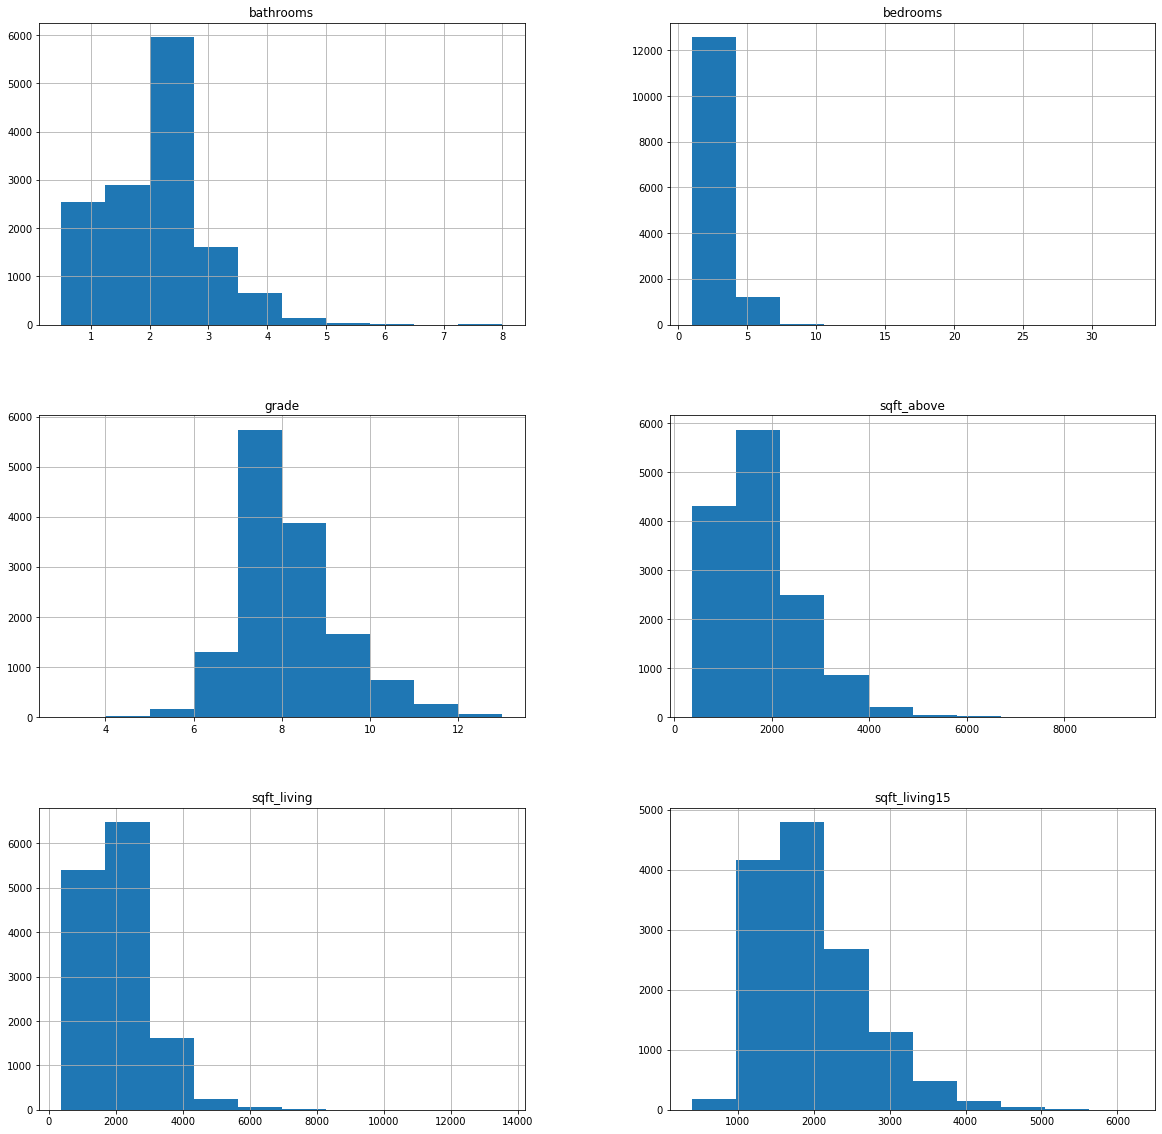

In [274]:
# checking for normality of most interesting data
merged[['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'sqft_above','sqft_living15', ]].hist(figsize = (20,20))
plt.show()

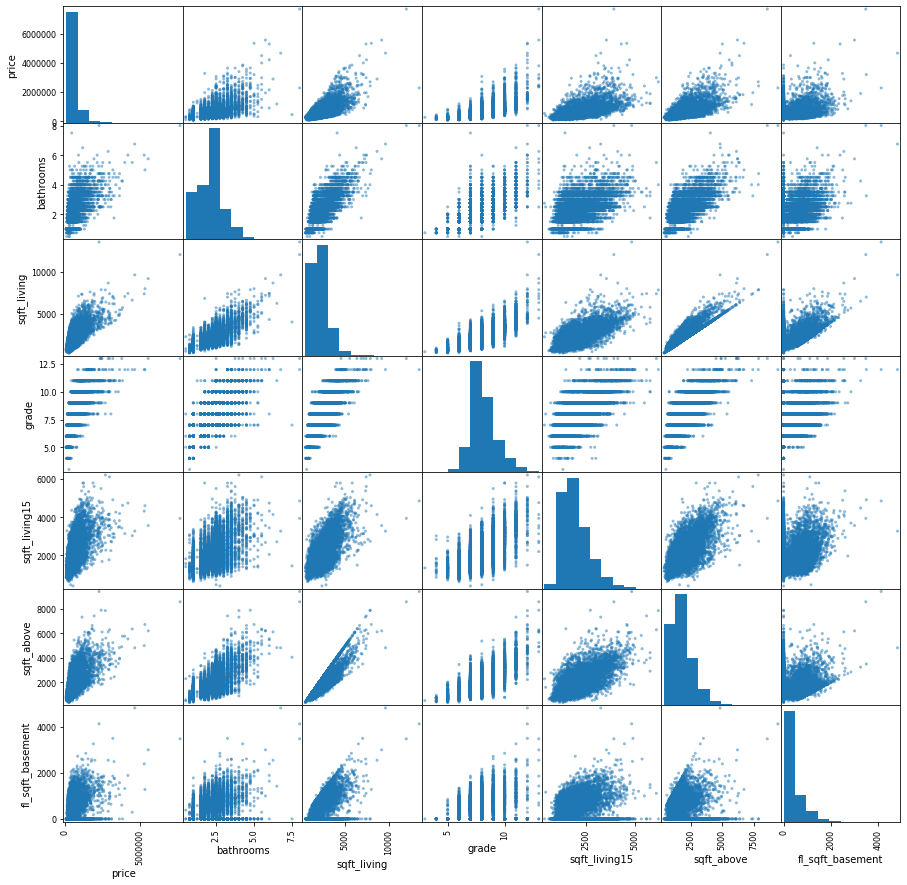

In [275]:
# checking for non-linear relationships
df_scatter = merged[['price', 'bathrooms','sqft_living', 'grade', 'sqft_living15', 'sqft_above', 'fl_sqft_basement']]
df_scatter

pd.plotting.scatter_matrix(df_scatter,figsize  = [15, 15]);
plt.show()

In [276]:
merged['grade'].value_counts()

7     5739
8     3874
9     1653
6     1309
10     735
11     270
5      162
12      50
4       18
13      10
3        1
Name: grade, dtype: int64

# Baseline Model Only with 'Grade'


In [277]:
# baseline model only with grade
import statsmodels.api as sm


y = target
X = merged['grade'] 
# Setting up the LEARNER
X = sm.add_constant(X)
model_sm = sm.OLS(y,X)

# Actually LEARNING
results = model_sm.fit()

# Evaluating performance
r2 = results.rsquared
r2 = r2.round(2)
print('R2 = {}'.format(r2))

# # Understanding the LEARNED model
est_b = results.params
print(est_b.round(4))                                                           
                                                                   
    


R2 = 0.45
const   -1.039073e+06
grade    2.059531e+05
dtype: float64


In [279]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                 1.116e+04
Date:                Fri, 27 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:07:36   Log-Likelihood:            -1.9246e+05
No. Observations:               13821   AIC:                         3.849e+05
Df Residuals:                   13819   BIC:                         3.849e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.039e+06   1.51e+04    -68.804      0.000   -1.07e+06   -1.01e+06
grade        2.06e+05   1949.298    105.655      0.000    2.02e+05     2.1e+05
==============================================================================
Omnibus:                    12265.117   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1060517.883
Skew:                           3.887   Prob(JB):                         0.00
Kurtosis:                      45.203   Cond. No.                         51.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model with Grade, Bath, Bedrooms and Dummy Renovated and Square Foot Living

In [280]:
 
dummy_renovated = merged['renovation_yes']
bath = merged['bathrooms']
bedroom  = merged['bedrooms']
grade = merged['grade']
sqft = merged ['sqft_living']

# concatenate all variables into a new dataframe

data_ols_1 = pd.concat([dummy_renovated, bedroom, grade, bath], axis=1)


import statsmodels.api as sm

y = target
X = data_ols_1 
# Setting up the LEARNER
X = sm.add_constant(X)
model_sm = sm.OLS(y,X)

# Actually LEARNING
results = model_sm.fit()

# Evaluating performance
r2 = results.rsquared
r2 = r2.round(2)
print('R2 = {}'.format(r2))

# # Understanding the LEARNED model
est_b = results.params
print(est_b.round(12))    


R2 = 0.47
const            -992057.983677
renovation_yes    205550.922600
bedrooms           15585.307040
grade             176486.696662
bathrooms          56166.860970
dtype: float64


In [281]:
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     3074.
Date:                Fri, 27 Mar 2020   Prob (F-statistic):               0.00
Time:                        11:07:51   Log-Likelihood:            -1.9215e+05
No. Observations:               13821   AIC:                         3.843e+05
Df Residuals:                   13816   BIC:                         3.844e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -9.921e+05   1.65e+04    -60.217      0.000   -1.02e+06    -9.6e+05
renovation_yes  2.056e+05   1.22e+04     16.854      0.000    1.82e+05    2.29e+05
bedrooms        1.559e+04   2767.786      5.631      0.000    1.02e+04     2.1e+04
grade           1.765e+05   2567.010     68.752      0.000    1.71e+05    1.82e+05
bathrooms       5.617e+04   4248.926     13.219      0.000    4.78e+04    6.45e+04
==============================================================================
Omnibus:                    11875.397   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           888588.234
Skew:                           3.734   Prob(JB):                         0.00
Kurtosis:                      41.565   Cond. No.                         65.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

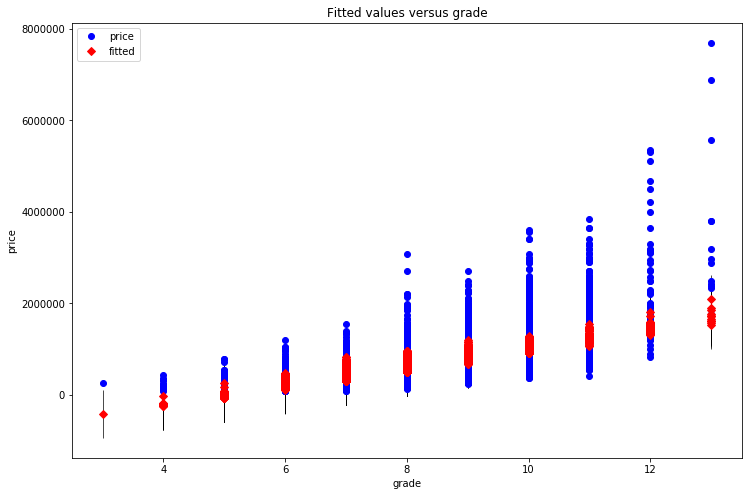

In [262]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(results , "grade", ax=ax)

It seems like this model doesn't describe much in regards to the variaton of data. It might be good to take out some of the most expensive properties and create another model just for them.

**Final Model:**


price = - 205550 * \beta_{renovation_yes} + 15585 * \beta_{bedrooms} + 56166 * \beta_{bathrooms}  - 26,368 * \beta_{yr_built} - 992057

#  Final Test

In [267]:
# Haven't made any major changes to the trainig data so I can input the test data 
# and run my regression
dummy_renovated_test = merged_test['renovation_yes']
bath_test = merged_test['bathrooms']
bedroom_test  = merged_test['bedrooms']
grade_test = merged_test['grade']


# concatenate all variables into a new dataframe

data_ols_test = pd.concat([dummy_renovated_test, bedroom_test, grade_test, bath_test], axis=1)


import statsmodels.api as sm

y = target_test
X = data_ols_test 
# Setting up the LEARNER
X = sm.add_constant(X)
model_sm = sm.OLS(y,X)

# Actually LEARNING
results = model_sm.fit()

# Evaluating performance
r2 = results.rsquared
r2 = r2.round(2)
print('R2 = {}'.format(r2))

# # Understanding the LEARNED model
est_b = results.params
print(est_b.round(12))    



R2 = 0.46
const            -1.030045e+06
renovation_yes    1.966112e+05
bedrooms          2.574444e+04
grade             1.820663e+05
bathrooms         4.023749e+04
dtype: float64


It seems like our model is working even with out test data
Our model should be able to explain %46 of the variation in price given those variables